# Setting up

In [1]:
from Fantasy import Fantasy
import warnings
import matplotlib.pyplot as plt
import requests
%matplotlib inline
plt.style.use('ggplot')

warnings.filterwarnings("ignore")

league = 'fpl'

if league == 'fpl':
    url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
    goalkeeper = 'Goalkeeper'
    defender = 'Defender'
    midfielder = 'Midfielder'
    forward = 'Forward'
else:
    url = 'https://fantasy.allsvenskan.se/api/bootstrap-static/'
    goalkeeper = 'Målvakt'
    defender = 'Försvarare'
    midfielder = 'Mittfältare'
    forward = 'Anfallare'

response = requests.get(url)
json = response.json()

# due to FDR
unwanted_teams = []

higher_than = {
    'value_season': 0,
    'value_season_adj': 0.5, # for filtering
    'form': 0,
    'value_form': 0,
    'minutes': 90*5,
    'points_per_game': 0
}

max_cost = 1000

fantasy = Fantasy(json, unwanted_teams, higher_than, max_cost)


def getBarPlot(column, element):
    pivot = fantasy.createPivot(column, element).sort_values(element)

    pivot.plot(kind='barh', x=column, figsize=(10, 6))


def getScatterPlot(position, x, y):
    df = fantasy.dfFiltered('element_type', position, 'value_season')

    ax = df.plot.scatter(x=x, y=y, alpha=.5, figsize=(
        20, 10), title=f"{position}: {x} v {y}")

    for i, txt in enumerate(df.web_name):
        ax.annotate(txt, (df[x].iat[i], df[y].iat[i]))

    plt.grid(which='both', axis='both', ls='-')
    plt.show()


# Aggregate

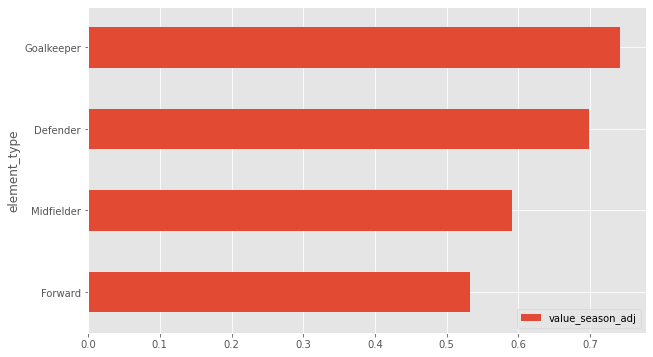

In [2]:
# Avg value per position
getBarPlot('element_type', 'value_season_adj')

In [ ]:
# Avg value per team
getBarPlot('team', 'value_season_adj')

In [ ]:
# Avg form per team
getBarPlot('team', 'form')

# Players overall

In [ ]:
# Most valuable 15
gk_df = fantasy.dfFiltered('element_type', goalkeeper, 'value_season_adj').head(2)
def_df = fantasy.dfFiltered('element_type', defender, 'value_season_adj').head(5)
mid_df = fantasy.dfFiltered('element_type', midfielder, 'value_season_adj').head(5)
fwd_df = fantasy.dfFiltered('element_type', forward, 'value_season_adj').head(3)

top = gk_df.append(def_df).append(mid_df).append(fwd_df)
top

In [ ]:
# Sorting by value season
fantasy.getPlayerDf().sort_values('value_season_adj', ascending=False).head(10)

In [ ]:
# Sorting by form
fantasy.getPlayerDf().sort_values('form', ascending=False).head(10)

In [ ]:
# Scatterplot of most valuable players

x = 'total_points'
y = 'value_season_adj'

top_gk = fantasy.dfFiltered('element_type', goalkeeper, x).head()
top_def = fantasy.dfFiltered('element_type', defender, x).head()
top_mid = fantasy.dfFiltered('element_type', midfielder, x).head()
top_fwd = fantasy.dfFiltered('element_type', forward, x).head()

ax = top_gk.plot.scatter(x=x, y=y, color='DarkBlue', label='GK', s=top_gk[x], alpha=.5, figsize=(15,10), title="Top 5 Players by Position")
for i, txt in enumerate(top_gk.web_name):
    ax.annotate(txt, (top_gk[x].iat[i],top_gk[y].iat[i]))

top_def.plot.scatter(x=x, y=y, color='DarkGreen', label='DEF', s=top_gk[x], ax=ax)
for i, txt in enumerate(top_def.web_name):
    ax.annotate(txt, (top_def[x].iat[i],top_def[y].iat[i]))
    
top_mid.plot.scatter(x=x, y=y, color='DarkOrange', label='MID', s=top_gk[x], ax=ax)
for i, txt in enumerate(top_mid.web_name):
    ax.annotate(txt, (top_mid[x].iat[i],top_mid[y].iat[i]))
    
top_fwd.plot.scatter(x=x, y=y, color='DarkRed', label='FWD', s=top_gk[x], ax=ax)
for i, txt in enumerate(top_fwd.web_name):
    ax.annotate(txt, (top_fwd[x].iat[i],top_fwd[y].iat[i]))

# Goalkeepers

In [ ]:
# Value
fantasy.dfFiltered('element_type', goalkeeper, 'value_season_adj').head(5)

In [ ]:
# Form
fantasy.dfFiltered('element_type', goalkeeper, 'form').head(5)

In [ ]:
getScatterPlot(goalkeeper, 'form', 'value_season_adj')
getScatterPlot(goalkeeper, 'now_cost', 'value_season_adj')

# Defenders

In [ ]:
# Value
fantasy.dfFiltered('element_type', defender, 'value_season_adj').head(5)

In [ ]:
# Form
fantasy.dfFiltered('element_type', defender, 'form').head(5)

In [ ]:
getScatterPlot(defender, 'form', 'value_season_adj')
getScatterPlot(defender, 'now_cost', 'value_season_adj')

# Midfielders

In [ ]:
# Value
fantasy.dfFiltered('element_type', midfielder, 'value_season_adj').head(5)

In [ ]:
# Value
fantasy.dfFiltered('element_type', midfielder, 'form').head(5)

In [ ]:
getScatterPlot(midfielder, 'form', 'value_season_adj')
getScatterPlot(midfielder, 'now_cost', 'value_season_adj')

# Forwards

In [ ]:
# Value
fantasy.dfFiltered('element_type', forward, 'value_season_adj').head(5)

In [ ]:
# Value
fantasy.dfFiltered('element_type', forward, 'form').head(5)

In [ ]:
getScatterPlot(forward, 'form', 'value_season_adj')
getScatterPlot(forward, 'now_cost', 'value_season_adj')